In [1]:
# Machine Learning Assignment - Exercise 01
# Prof. Klaus Berberich
# Students:
# Aaron Dassen
# Jan Beckhausen
# Germain Girndt

In [2]:
# IMPORTS AND DEFINITIONS ONLY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def analyze_feature_individually(feature):
    feature_mean = feature.mean()
    feature_variance = feature.var()
    
    print(f"Analyzed Feature: {acronym_to_name.get(feature.name)}")
    print(f"Mean Value: {feature_mean:.2f}")
    print(f"Variance: {feature_variance:.2f}\n")

def add_bold(string):
    BOLD = "\033[1m"
    RESET = "\033[0m" 
    return BOLD + string + RESET
    
    
def analyze_features_jointly(feature_one, feature_two):
    
    pearsons_correlation = feature_one.corr(feature_two, method='pearson')
    covariance = feature_one.cov(feature_two)

    print(f"Covariance: {covariance:.2f}")
    print(add_bold(f"Pearson's Correlation: {pearsons_correlation:.2f}"))
    
def create_figure(feature_x, feature_y):
    title = f"{acronym_to_name.get(feature_x.name)} x {acronym_to_name.get(feature_y.name)}"
    figure = plt.figure()
    ax = figure.add_subplot(111)
    
    color = np.abs(feature_x) + np.abs(feature_y)
    ax.scatter(feature_x, feature_y, c=color, cmap='plasma')
    ax.set_xlabel(acronym_to_name.get(feature_x.name))
    ax.set_ylabel(acronym_to_name.get(feature_y.name))
    ax.set_title(title)
    
    return figure
    

def create_figure_with_regression_line(feature_x, feature_y, w0_star, w1_star):
    figure = create_figure(feature_x, feature_y)
    ax = figure.get_axes()[0]
    regression_line_y = w0_star + w1_star * feature_x
    ax.plot(feature_x, regression_line_y, color='red', label='Regression Line')
    ax.legend()
    
    return figure

    
# Load the data
PATH_TO_DATA="./kaggle/Spotify 2010 - 2019 Top 100.csv"
data = pd.read_csv(PATH_TO_DATA)












In [3]:
acronym_to_name = {
    "bpm": "Beats per Minute (bpm)",
    "nrgy": "Energy (ngry)",
    "dnce": "Danceability (dnce)",
    "val": "Mood (val)",
    "pop": "Popularity (pop)"
}

# Setting variables used by the following snippets
feature_names = ["pop", "top genre", "bpm", "nrgy", "dnce", "val"]

features_df = data[feature_names]
pop_series = features_df.get("pop")
genre_series = features_df.get("top genre")

other_features_df = features_df[feature_names[2:]]



In [4]:
# Taking a look at the data (Not part of the exercise solution)

df_cleaned = features_df.copy()
df_cleaned.dropna(inplace=True)

df_cleaned.describe(include="all").round(2)

# Note: The NaNs are not representative;
# They're simply caused by trying to output numeric statical coefficients for non-numeric values and vice-versa

,pop,top genre,bpm,nrgy,dnce,val
count,1000.00,1000,1000.00,1000.00,1000.00,1000.00
unique,NaN,132,NaN,NaN,NaN,NaN
top,NaN,dance pop,NaN,NaN,NaN,NaN
freq,NaN,361,NaN,NaN,NaN,NaN
mean,74.84,NaN,121.26,69.50,66.88,50.90
std,8.81,NaN,26.24,15.96,13.12,21.56
min,35.00,NaN,65.00,6.00,19.00,4.00
25%,70.00,NaN,100.00,59.00,59.00,35.00
50%,76.00,NaN,122.00,71.00,68.00,50.50
75%,81.00,NaN,134.00,81.25,75.00,68.00


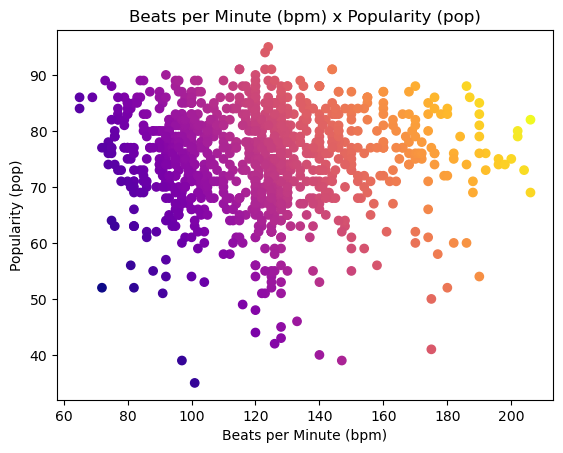

Analyzed Feature: Popularity (pop)
Mean Value: 74.84
Variance: 77.58

Analyzed Feature: Beats per Minute (bpm)
Mean Value: 121.26
Variance: 688.43

Covariance: -5.79
Pearson's Correlation: -0.03

----------------------------------------------------------------------------------------------------


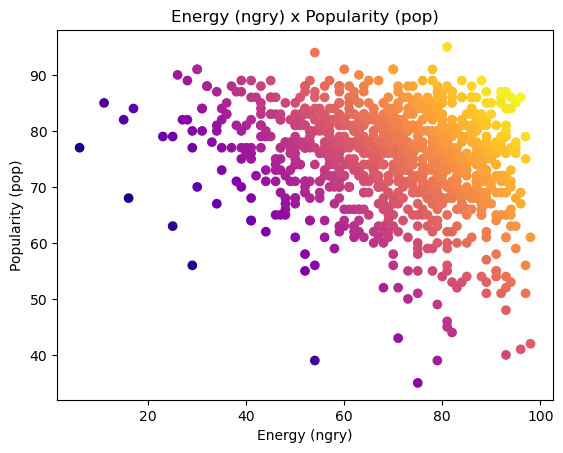

Analyzed Feature: Popularity (pop)
Mean Value: 74.84
Variance: 77.58

Analyzed Feature: Energy (ngry)
Mean Value: 69.50
Variance: 254.77

Covariance: -32.90
Pearson's Correlation: -0.23

----------------------------------------------------------------------------------------------------


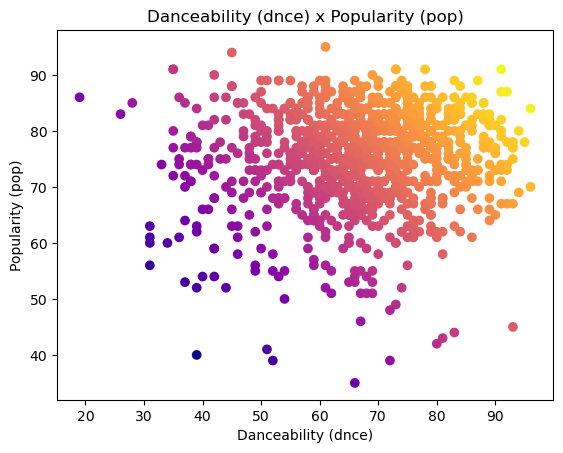

Analyzed Feature: Popularity (pop)
Mean Value: 74.84
Variance: 77.58

Analyzed Feature: Danceability (dnce)
Mean Value: 66.88
Variance: 172.18

Covariance: 10.77
Pearson's Correlation: 0.09

----------------------------------------------------------------------------------------------------


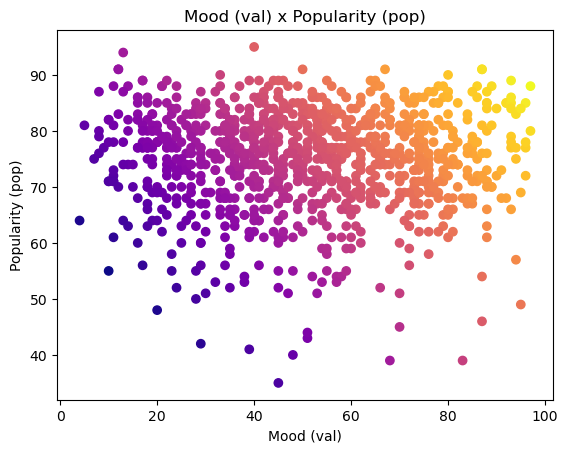

Analyzed Feature: Popularity (pop)
Mean Value: 74.84
Variance: 77.58

Analyzed Feature: Mood (val)
Mean Value: 50.90
Variance: 464.98

Covariance: -0.71
Pearson's Correlation: -0.00

----------------------------------------------------------------------------------------------------


In [5]:
# 1.1a - Create scatter plots and compute Pearson's correlation coefficients
for _, feature_series in other_features_df.items():
    
    create_figure(feature_series, pop_series)

    plt.show()
        
    analyze_feature_individually(pop_series)
    analyze_feature_individually(feature_series)
    analyze_features_jointly(pop_series, feature_series)
    
    
    print("\n" + "-" * 100)

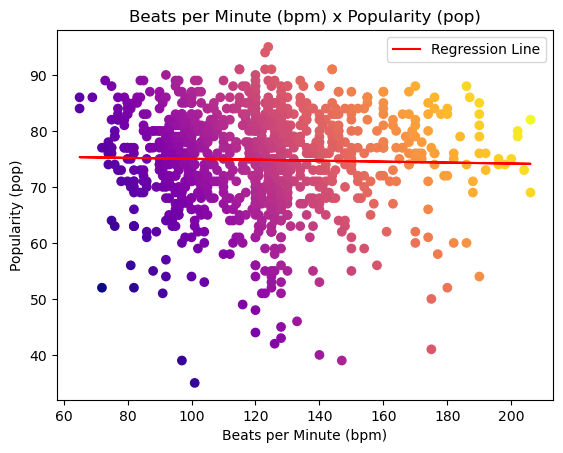

Feature: Beats per Minute (bpm)
Optimal coefficients:
w0*: 75.86001469706761
w1*: -0.008411659852778397
Mean Squared Error: 77.45173787481897


----------------------------------------------------------------------------------------------------


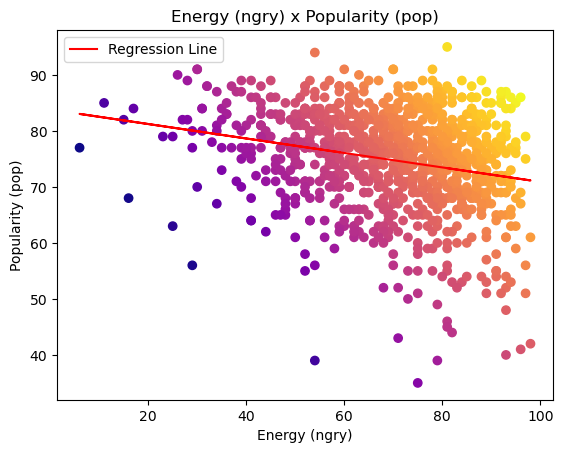

Feature: Energy (ngry)
Optimal coefficients:
w0*: 83.81494234951504
w1*: -0.12913214511114834
Mean Squared Error: 73.25638424106344


----------------------------------------------------------------------------------------------------


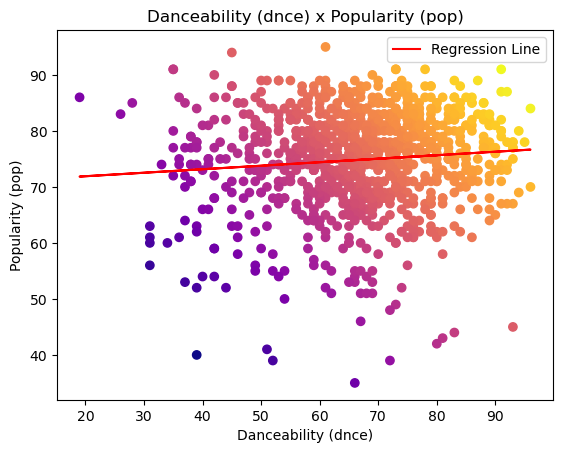

Feature: Danceability (dnce)
Optimal coefficients:
w0*: 70.65738426268062
w1*: 0.06254285150606158
Mean Squared Error: 76.82755399664151


----------------------------------------------------------------------------------------------------


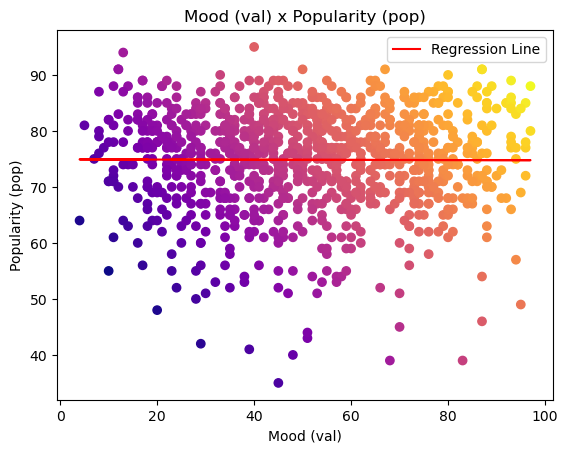

Feature: Mood (val)
Optimal coefficients:
w0*: 74.91800254527301
w1*: -0.001532436401505128
Mean Squared Error: 77.49930915047214


----------------------------------------------------------------------------------------------------


In [6]:
# 1.1b - Ordinary Least Squares:
# Determine optimal coeficients, add a regression line to the plot, compute mean squared error (MSE)

for _, feature_series in other_features_df.items():
    
    # Defining X and Y
    Y = pop_series
    X = feature_series


    # Dropping rows where either Y or X have NaNs
    df = pd.DataFrame({Y.name: Y, X.name: X}).dropna(how='any')

    filtered_Y = df.get(Y.name)
    filtered_X = df.get(X.name)

    # Making sure that both variables have the same size
    treated_Y = filtered_Y[0:len(filtered_X)]
    # Converting 1d matrix into a 2d matrix (required by the model.fit() method)
    treated_X = filtered_X.values.reshape(-1, 1)


    # Creating a linear regression model and fitting it to the data
    model = LinearRegression()
    model.fit(treated_X, treated_Y)
    
    # Separating coeficients
    w0_star = model.intercept_
    w1_star = model.coef_[0]


    # Calculating the mean squared error (MSE)
    mse = sum((model.predict(treated_X) - treated_Y)**2) / len(treated_Y) 
    
    # Ploting chart
    create_figure_with_regression_line(X, Y, w0_star, w1_star)
    plt.show()
    
    # Printing Info
    print(f"{add_bold('Feature')}: {acronym_to_name.get(X.name)}")
    print(add_bold("Optimal coefficients:"))
    print(f"w0*: {w0_star}")
    print(f"w1*: {w1_star}")
    print(f"{add_bold('Mean Squared Error')}: {mse}")
    print()
    print("\n" + "-" * 100)





In [7]:
# 1.c - Multiple linear regression
# Model for all features (including the nominal feature genre)
# Randomly split data into training (80%) and test (20%)
# Determine optimal coefficients for the training and mean squared error for the test data


def print_multiple_linear_regression_test(X, Y):
    # Splitting into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2023)


    # Creating a linear regression model and fitting it to the data
    model = LinearRegression()
    model.fit(X_train, y_train)

    w0_star = model.intercept_
    w1_until_n_star = model.coef_


    # Calculating the mean squared error (MSE)
    mse = sum((model.predict(X_test) - y_test)**2) / len(y_test)

    print(f"{add_bold('Mean Squared Error:')} {mse}")
    print(add_bold("Optimal coefficients:"))
    print(f"w0*: {w0_star}")
    print(f"w1...n*: {w1_until_n_star}")
    print("\n" + "-" * 100 + "\n\n")

# Droping rows where either Y or X have NaNs
def clean_na(X, Y):
    df = pd.concat([X, Y], axis=1).dropna(how='any')

    cleaned_Y_series = df.get(Y.name)
    cleaned_X_df = df.loc[:, df.columns != Y.name]
    
    return [cleaned_X_df, cleaned_Y_series]

def merge_less_frequent_genres(one_hot_encoded_genre):

    # Minimum number of occurrences to keep the genre category as is
    number_of_data_points = one_hot_encoded_genre.shape[0]
    genre_threshold =  number_of_data_points * 0.005

    # Initialize a new category to group less frequent genres
    other_genre_category = "_others"
    
    
    # Identify genre categories with less than the threshold
    genre_counts = one_hot_encoded_genre[one_hot_encoded_genre.columns].sum()
    less_frequent_genres = genre_counts[genre_counts < genre_threshold].index.tolist()

    # Group less frequent genres into the "other" category
    if less_frequent_genres:
        one_hot_encoded_genre[other_genre_category] = one_hot_encoded_genre[less_frequent_genres].max(axis=1)
        one_hot_encoded_genre.drop(columns=less_frequent_genres, inplace=True)
        
    return one_hot_encoded_genre

def merge_similar_categories(one_hot_encoded_genre):

    big_genre_categories = [ "rock", "hip hop", "rap", "dance", "r&b", "reggae", "electro", "indie", "wave", "house", "metal", "french", "techno", "afro", "funk", "country", "latin", "pop"]

    for genre_category in big_genre_categories:
        # Get all columns names containing the substring genre_category
        genre_columns = [col for col in one_hot_encoded_genre.columns if genre_category in col]

        # set a new column
        one_hot_encoded_genre["_" + genre_category] = 0

        # Set the new column's bit for all rows which match rows
        has_row_any_genre_column_set_as_true = one_hot_encoded_genre[genre_columns].any(axis=1)
        one_hot_encoded_genre.loc[has_row_any_genre_column_set_as_true, "_" + genre_category] = 1
        
        # Drop the original genre columns
        other_columns = list(filter( lambda x : x != genre_category, genre_columns))

        one_hot_encoded_genre.drop(columns=genre_columns, inplace=True)
    


    return one_hot_encoded_genre
        
        
print(f"{add_bold('Multiple linear regression WITHOUT one hot encoding')} (good results):\n")
Y = pop_series.copy()
X = other_features_df.copy()
[X, Y] = clean_na(X, Y)
print_multiple_linear_regression_test(X, Y)

print(f"{add_bold('Multiple linear regression WITH one hot encoding')} (worst results):\n")
one_hot_encoded_genre = pd.get_dummies(genre_series) # One hot encoding for genre
one_hot_encoded_genre.rename(columns={"pop": "_pop music"}, inplace=True) # renaming the column 'pop' genre for avoiding colision with the feature pop

Y = pop_series.copy()
X = pd.concat([other_features_df.copy(), one_hot_encoded_genre.copy()], axis=1)
[X, Y] = clean_na(X, Y)
print_multiple_linear_regression_test(X, Y)


print(f"{add_bold('Multiple linear regression WITH TREATED one hot encoding')} (best results!!!):\n")
treated_one_hot_encoded_genre = merge_less_frequent_genres(merge_similar_categories(one_hot_encoded_genre.copy()))


Y = pop_series.copy()
X = pd.concat([other_features_df.copy(), treated_one_hot_encoded_genre.copy()], axis=1)
[X, Y] = clean_na(X, Y)

print_multiple_linear_regression_test(X, Y)

Multiple linear regression WITHOUT one hot encoding (good results):

Mean Squared Error: 72.25867463528768
Optimal coefficients:
w0*: 79.61877112413008
w1...n*: [ 0.00423287 -0.13743118  0.0370837   0.03353011]

----------------------------------------------------------------------------------------------------


Multiple linear regression WITH one hot encoding (worst results):

Mean Squared Error: 3.811992073963105e+22
Optimal coefficients:
w0*: -650799442200.3964
w1...n*: [ 3.18953010e-03 -1.26334911e-01  4.51161324e-02  4.54139468e-02
  6.50799442e+11  6.50799442e+11  6.50799442e+11  6.50799442e+11
  6.50799442e+11  6.50799442e+11  6.50799442e+11  6.50799442e+11
  6.50799442e+11  6.50799442e+11  6.50799442e+11  6.50799442e+11
  6.50799442e+11  6.50799442e+11  6.50799442e+11  6.50799442e+11
  6.50799442e+11  6.50799442e+11  6.50799442e+11  6.50799442e+11
  2.63979409e+08 -4.76239630e+08  6.50799442e+11  6.50799442e+11
  6.50799442e+11  1.29122042e+07 -4.55362851e+06  6.50799442e+11
 